In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt as sqrt

# Import data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [4]:
train.shape

(27321, 80)

In [5]:
test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [6]:
test.shape

(11709, 80)

# Figure out the primary key and look for the requirement of indexing

Here primary key is UID

In [7]:
train.set_index("UID")


,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279212,NaN,140,43,72,Puerto Rico,PR,Coamo,Coamo,Urban,tract,...,42.73154,40.16667,24.79821,230.87898,938.0,0.60422,0.24603,0.03042,0.02249,0.14683
277856,NaN,140,91,42,Pennsylvania,PA,Blue Bell,Blue Bell,Borough,tract,...,38.21269,39.50000,21.84826,496.20427,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888
233000,NaN,140,87,8,Colorado,CO,Weldona,Saddle Ridge,City,tract,...,43.40218,46.33333,23.40858,316.52078,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712


In [8]:
test.set_index("UID")

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238088,NaN,140,105,12,Florida,FL,Lakeland,Crystal Springs,City,tract,...,53.51255,59.58333,23.23426,699.33353,2914.0,0.93121,0.65969,0.02135,0.02135,0.08780
242811,NaN,140,31,17,Illinois,IL,Chicago,Chicago City,Village,tract,...,33.14169,32.83333,20.24698,306.63915,1191.0,0.33122,0.42882,0.07781,0.02829,0.05305
250127,NaN,140,9,25,Massachusetts,MA,Lawrence,Methuen Town City,City,tract,...,43.53905,43.66667,23.17995,900.13903,3723.0,0.84372,0.50269,0.00108,0.00108,0.07294


# Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [9]:
train.isnull().sum()

UID                0
BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 80, dtype: int64

since all the values of 'BLOCKID' are null values we can drop this column 

In [10]:
train.drop(['BLOCKID','SUMLEVEL'],axis=1,inplace=True)

In [11]:
null_values=train.isnull().sum()*100/len(train)
null_train=pd.DataFrame(null_values,columns=["pecentage of null values"])

In [12]:
null_train

,pecentage of null values
UID,0.000000
COUNTYID,0.000000
STATEID,0.000000
state,0.000000
state_ab,0.000000
...,...
pct_own,0.980930
married,0.699096
married_snp,0.699096
separated,0.699096


In [13]:
train_df=train.fillna(train.mean())

C:\Users\jayaj\AppData\Local\Temp\ipykernel_14616\4020535406.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df=train.fillna(train.mean())


In [14]:
train_df.isnull().sum().sum()

0

In [15]:
train_df.shape

(27321, 78)

In [16]:
test.isnull().sum()

UID                0
BLOCKID        11709
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          122
married           84
married_snp       84
separated         84
divorced          84
Length: 80, dtype: int64

In [17]:
test.drop(['BLOCKID','SUMLEVEL'],axis=1,inplace=True)

In [18]:
null_values_test=test.isnull().sum()*100/len(test)
null_test=pd.DataFrame(null_values_test,columns=["pecentage of null values"])

In [19]:
null_test

,pecentage of null values
UID,0.000000
COUNTYID,0.000000
STATEID,0.000000
state,0.000000
state_ab,0.000000
...,...
pct_own,1.041934
married,0.717397
married_snp,0.717397
separated,0.717397


In [20]:
test_df=test.fillna(test.mean())

C:\Users\jayaj\AppData\Local\Temp\ipykernel_14616\3467246593.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_df=test.fillna(test.mean())


In [21]:
test_df.isnull().sum().sum()

0

In [22]:
test_df.shape

(11709, 78)

# Exploratory Data Analysis (EDA):

In [23]:
train_df.groupby(by="second_mortgage")['pct_own'].nlargest(2500)

second_mortgage       
0.0              2062     1.00000
                 3108     1.00000
                 4317     1.00000
                 4874     1.00000
                 4982     1.00000
                           ...   
1.0              17289    0.01213
                 1211     0.01067
                 17083    0.01067
                 7413     0.00666
                 16834    0.00225
Name: pct_own, Length: 24686, dtype: float64

visualization using geo map is done using Tableau

In [24]:
train_df['Bad_Debt']=train_df['second_mortgage']+train_df['home_equity']-train_df['home_equity_second_mortgage']
train_df['Good_Debt'] = train_df['debt'] - train_df['Bad_Debt']

# Create pie charts to show overall debt and bad debt

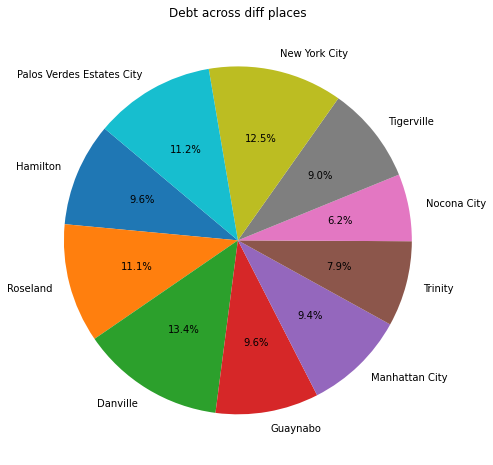

In [25]:
labels=list(train_df.place[:10])
debt=list(train_df.debt[:10])

plt.figure(figsize=(8,8))
plt.pie(debt, labels=labels,autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('Debt across diff places')
plt.show()

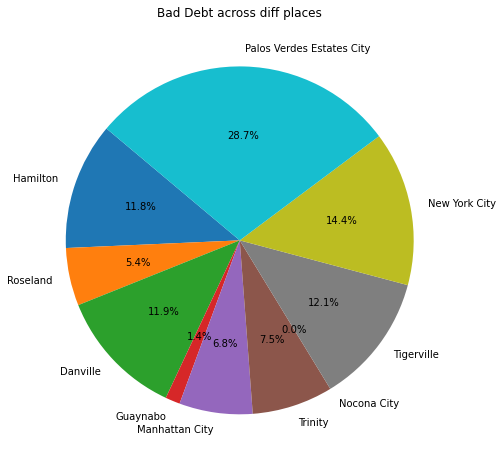

In [26]:
labels=list(train_df.place[:10])
Bad_debt=list(train_df['Bad_Debt'][:10])

plt.figure(figsize=(8,8))
plt.pie(Bad_debt, labels=labels,autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('Bad Debt across diff places')
plt.show()

### Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [27]:
train_df['city'].value_counts()[:15].index

Index(['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Bronx', 'Las Vegas', 'Phoenix', 'Miami',
       'Dallas', 'Detroit', 'New York', 'Columbus'],
      dtype='object')

F:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='second_mortgage'>

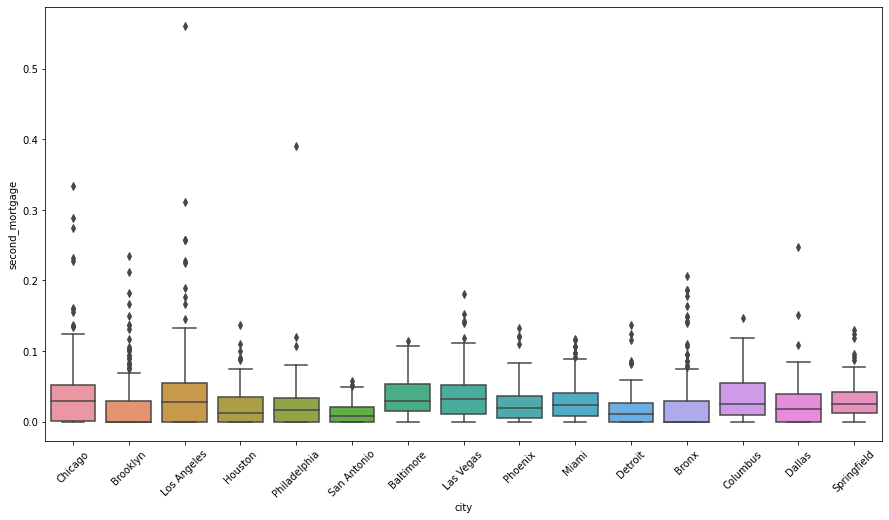

In [28]:
City=['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami', 'Detroit',
       'Bronx', 'Columbus', 'Dallas', 'Springfield']
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('city','second_mortgage',data=train_df,order=['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami', 'Detroit','Bronx', 'Columbus', 'Dallas', 'Springfield'])

In [29]:
train_df.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

F:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='home_equity'>

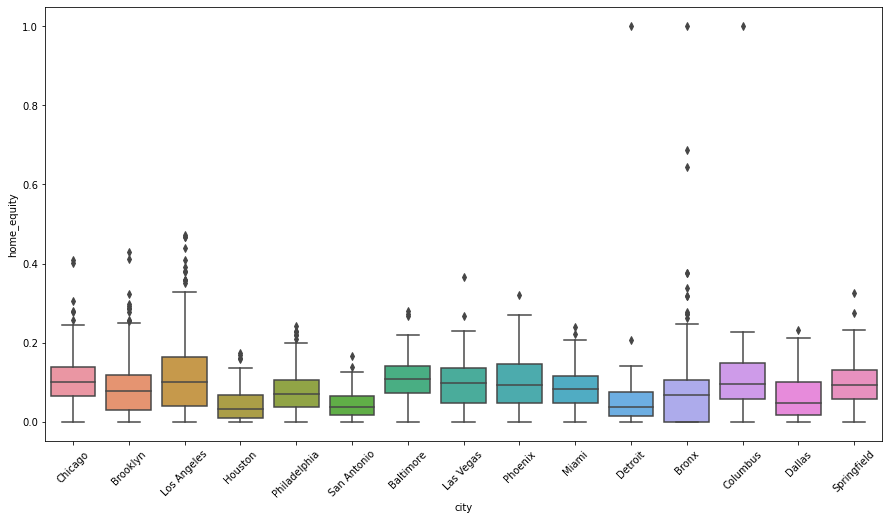

In [30]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('city','home_equity',data=train_df,order=['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami', 'Detroit','Bronx', 'Columbus', 'Dallas', 'Springfield'])

F:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='Bad_Debt'>

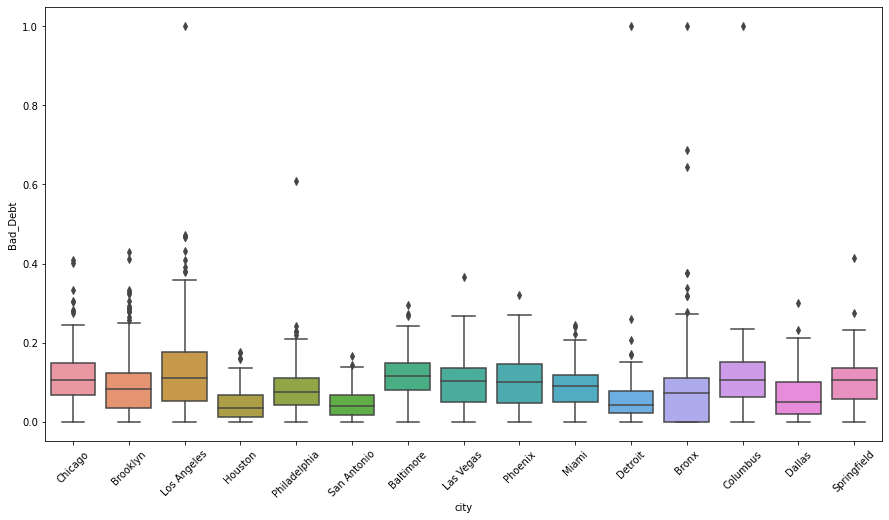

In [31]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('city','Bad_Debt',data=train_df,order=['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami', 'Detroit','Bronx', 'Columbus', 'Dallas', 'Springfield'])

### Create a collated income distribution chart for family income, house hold income, and remaining income

F:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


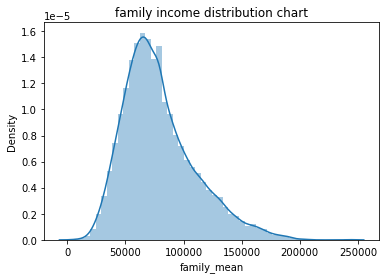

In [32]:
sns.distplot(train_df['family_mean'])
plt.title('family income distribution chart')
plt.show()

F:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


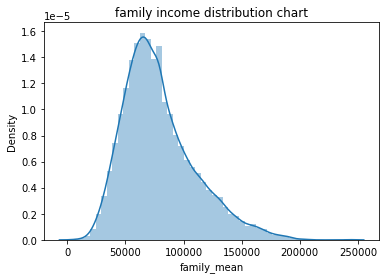

In [33]:
sns.distplot(train_df['family_mean'])
plt.title('family income distribution chart')
plt.show()

In [34]:
train_df['remaining income']=train_df['family_mean']-train_df['hi_mean']

F:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


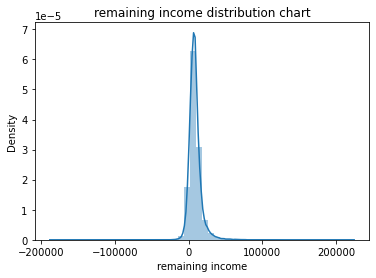

In [35]:
sns.distplot(train_df['remaining income'])
plt.title('remaining income distribution chart')
plt.show()

# Exploratory Data Analysis (EDA):

### Use pop and ALand variables to create a new field called population density

In [36]:
train_df['pop_density']=train_df['pop']/train_df['ALand']

F:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


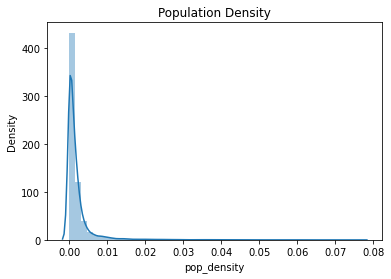

In [37]:
sns.distplot(train_df['pop_density'])
plt.title('Population Density')
plt.show()

### Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age 

In [38]:
train_df['median_age']=(train_df['male_age_median']*train_df['male_pop']+train_df['female_age_median']*train_df['female_pop'])/train_df['pop']

In [39]:
train_df[['median_age','male_age_median', 'female_age_median', 'male_pop','female_pop']].head()

,median_age,male_age_median,female_age_median,male_pop,female_pop
0,44.667430,44.00000,45.33333,2612,2618
1,34.722748,32.00000,37.58333,1349,1284
2,41.774472,40.83333,42.83333,3643,3238
3,49.879012,48.91667,50.58333,1141,1559
4,21.965629,22.41667,21.58333,2586,3051


F:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


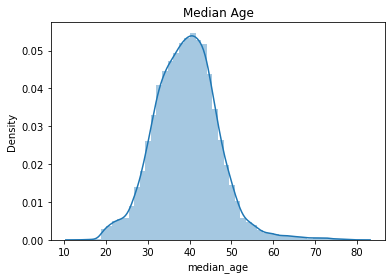

In [40]:
sns.distplot(train_df['median_age'])
plt.title('Median Age')
plt.show()

### Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis

In [41]:
train_df['pop_category']=pd.cut(train_df['pop'],bins=5,labels=['very low','low','average','high','very high'])

In [42]:
train_df[['pop','pop_category']]

,pop,pop_category
0,5230,very low
1,2633,very low
2,6881,very low
3,2700,very low
4,5637,very low
...,...,...
27316,1847,very low
27317,4155,very low
27318,2829,very low
27319,11542,low


### Analyze the married, separated, and divorced population for these population brackets

In [43]:
train_df.groupby(by='pop_category')[['married','separated','divorced']].agg(['mean'])

,married,separated,divorced
,mean,mean,mean
pop_category,,,
very low,0.507548,0.019126,0.100504
low,0.584894,0.015833,0.075348
average,0.655737,0.005003,0.065927
high,0.503359,0.008141,0.039030
very high,0.734740,0.004050,0.030360


### Visualize using appropriate chart type

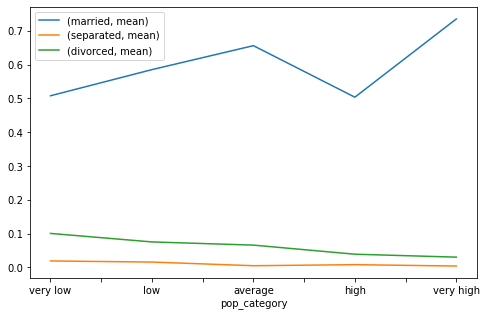

In [44]:
mean_data=train_df.groupby(by='pop_category')[['married','separated','divorced']].agg(['mean'])
mean_data.plot(figsize=(8,5))
plt.legend()
plt.show()

### Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [45]:
overall_rent_as_percentage=(train_df['rent_mean'].sum()/train_df['hi_mean'].sum())*100

In [46]:
overall_rent_as_percentage

1.4978864084231298

In [47]:
train_df['overall_rent_as_percentage']=(train_df['rent_mean']/train_df['hi_mean'])*100

In [48]:
train_df[['state','overall_rent_as_percentage']]

,state,overall_rent_as_percentage
0,New York,1.218824
1,Indiana,1.919490
2,Indiana,0.874441
3,Puerto Rico,1.648594
4,Kansas,2.948295
...,...,...
27316,Puerto Rico,2.373278
27317,Pennsylvania,1.512392
27318,Colorado,1.063197
27319,Texas,1.191743


### Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [49]:
train_df.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

<AxesSubplot:>

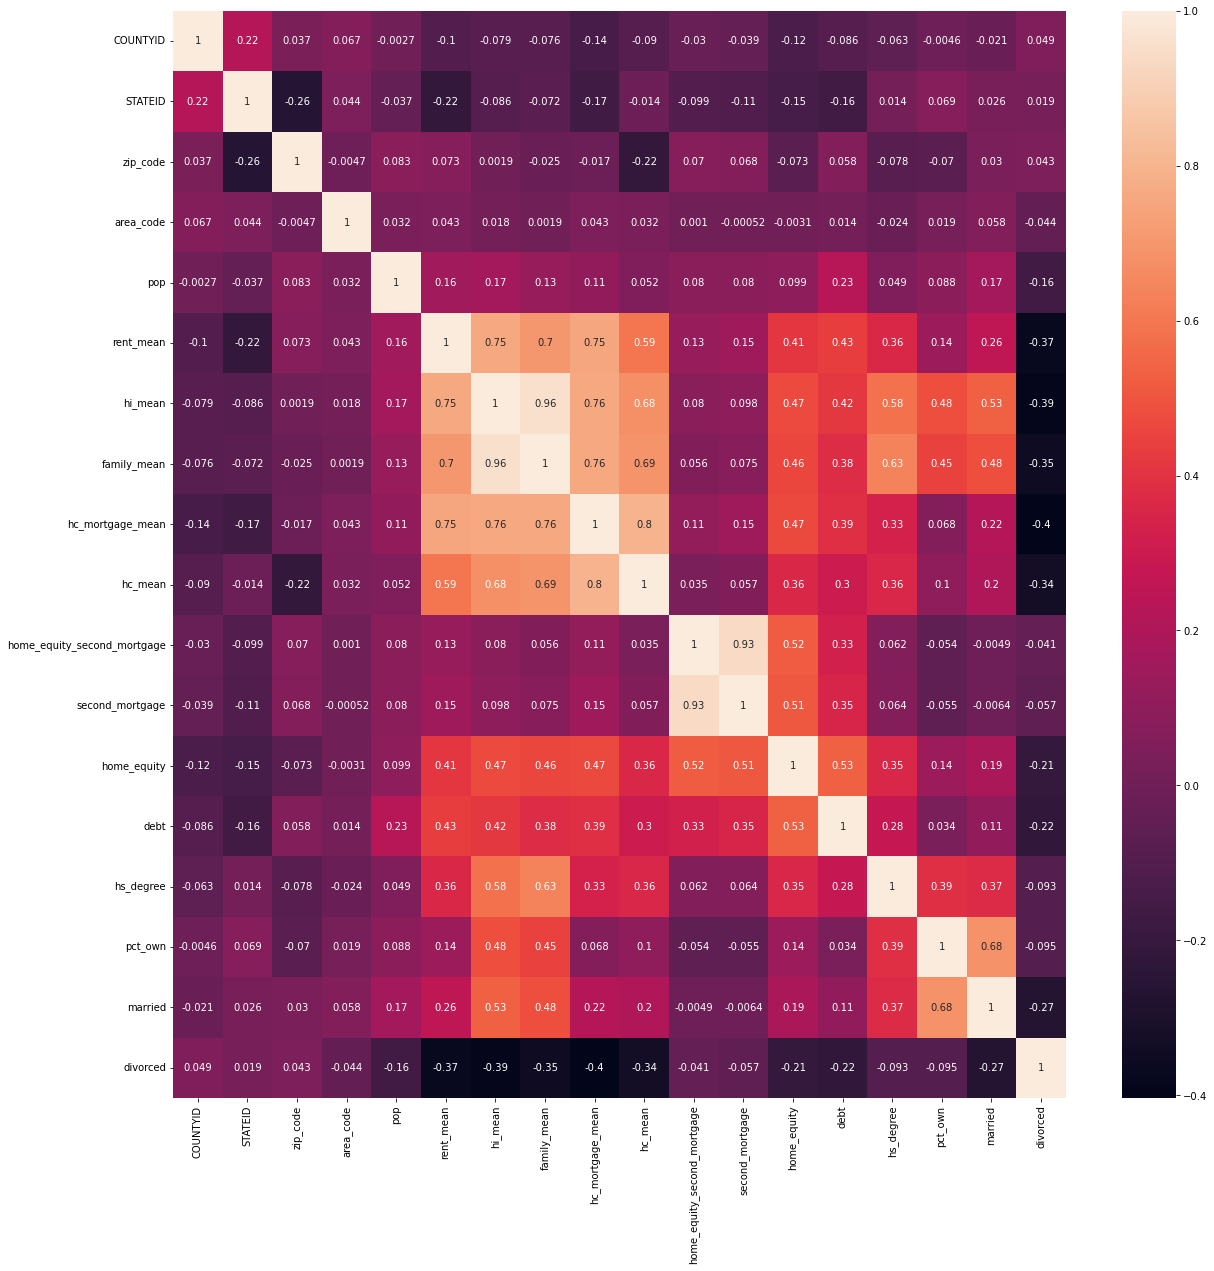

In [50]:
plt.figure(figsize=(20,20))
corr_col=train_df[['COUNTYID', 'STATEID','type','zip_code', 'area_code','pop', 'rent_mean','hi_mean','family_mean','hc_mortgage_mean',
       'hc_mean','home_equity_second_mortgage', 'second_mortgage','home_equity', 'debt','hs_degree','pct_own', 'married',
       'divorced']].corr()
sns.heatmap(corr_col,annot=True)

hi_mean has a high +ve correlation with hc_mortgage_mean,family_mean,rent_mean.
rent_mean has a +ve correlation with hc_mortgage_mean,family_mean.
family_mean is also correlated with hc_mortgage_mean.
hc_mean and hc_mortgage_mean is also highly correlated.
second_mortgage and home_equity_second_mortgage is also highly correlated.

#### The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain          insight into the linear relationships in the data. Following are the list of latent variables:
 Highschool graduation rates,Median population age,Second mortgage statistics,Percent own,Bad debt expense

In [51]:
def cat_variables(df):
    cat_variables = list(df.select_dtypes(exclude = ['int', 'float']).columns)
    return cat_variables

In [52]:
def num_variables(df):
    num_variables = list(df.select_dtypes(include = ['int', 'float']).columns)
    return num_variables

In [53]:
fa_train_df = train_df[num_variables(train_df)]
fa_train_df

,UID,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,...,married,married_snp,separated,divorced,Bad_Debt,Good_Debt,remaining income,pop_density,median_age,overall_rent_as_percentage
0,267822,53,36,13346,315,42.840812,-75.501524,2.021834e+08,1699120,5230,...,0.57851,0.01882,0.01240,0.08770,0.09408,0.43555,4868.86384,0.000026,44.667430,1.218824
1,246444,141,18,46616,574,41.701441,-86.266614,1.560828e+06,100363,2633,...,0.34886,0.01426,0.01426,0.09030,0.04274,0.56581,8738.17744,0.001687,34.722748,1.919490
2,245683,63,18,46122,317,39.792202,-86.515246,6.956160e+07,284193,6881,...,0.64745,0.02830,0.01607,0.10657,0.09512,0.63972,10319.83114,0.000099,41.774472,0.874441
3,279653,127,72,927,787,18.396103,-66.104169,1.105793e+06,0,2700,...,0.47257,0.02021,0.02021,0.10106,0.01086,0.51628,7668.01017,0.002442,49.879012,1.648594
4,247218,161,20,66502,785,39.195573,-96.569366,2.554403e+06,0,5637,...,0.12356,0.00000,0.00000,0.03109,0.05426,0.46512,22219.26930,0.002207,21.965629,2.948295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,279212,43,72,769,787,18.076060,-66.358379,6.970300e+05,0,1847,...,0.24603,0.03042,0.02249,0.14683,0.00000,0.11694,2373.47596,0.002650,40.904894,2.373278
27317,277856,91,42,19422,215,40.158138,-75.307271,5.077337e+06,11786,4155,...,0.61127,0.05003,0.02473,0.04888,0.20908,0.44456,-993.01490,0.000818,39.160488,1.512392
27318,233000,87,8,80653,970,40.410316,-103.814003,1.323262e+09,17577610,2829,...,0.70451,0.01386,0.00520,0.07712,0.07857,0.50238,8988.31921,0.000002,44.089311,1.063197
27319,287425,439,48,76034,817,32.904866,-97.162151,1.865230e+07,158882,11542,...,0.75503,0.02287,0.00915,0.05261,0.14305,0.51417,1638.56660,0.000619,45.029280,1.191743


In [54]:
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [55]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [56]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [57]:
fa_train_df = fa_train_df[fa_train_df.columns[~fa_train_df.columns.isin(['SUMLEVEL', 'lat', 'lng','ALand'])]]

In [58]:
fa = FactorAnalyzer( rotation=None, n_factors = 25)
fa.fit(fa_train_df)

FactorAnalyzer(n_factors=25, rotation=None, rotation_kwargs={})

### Build a linear Regression model to predict the total monthly expenditure for home mortgages loan.

In [59]:
train_df.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

In [60]:
train_df.isnull().sum().tail(10)

married_snp                     0
separated                       0
divorced                        0
Bad_Debt                        0
Good_Debt                       0
remaining income                0
pop_density                     0
median_age                    182
pop_category                    0
overall_rent_as_percentage      0
dtype: int64

In [61]:
train_df.median_age.fillna(train_df.median_age.median(),inplace=True)

In [62]:
train_df.isnull().sum().sum()

0

In [63]:
train_df['type'].unique()

array(['City', 'Urban', 'Town', 'CDP', 'Village', 'Borough'], dtype=object)

In [64]:
from sklearn import preprocessing


In [65]:
le = preprocessing.LabelEncoder()

In [66]:
train_df['type'] = le.fit_transform(train_df['type'])


In [67]:
train_df['type'].unique()

array([2, 4, 3, 1, 5, 0])

In [68]:
test_df['type'] = le.fit_transform(test_df['type'])

In [69]:
test_df['type'].unique()

array([1, 2, 0, 3, 5, 4])

In [70]:
x_train=train_df.drop(columns=['hc_mortgage_mean','state', 'state_ab', 'city','place','primary','median_age','Bad_Debt', 'Good_Debt', 'remaining income', 'pop_density', 'pop_category', 'overall_rent_as_percentage',])
y_train=train_df['hc_mortgage_mean']

In [71]:
x_test=test_df.drop(columns=['hc_mortgage_mean','state', 'state_ab', 'city','place','primary'])
y_test=test_df['hc_mortgage_mean']

In [72]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [73]:
y_pred=regressor.predict(x_test)

In [74]:
y_pred

array([1136.7291915 , 1514.17264188, 1219.59797135, ..., 1854.1775953 ,
       1158.80679897, 1384.541872  ])

In [75]:
from sklearn.metrics import accuracy_score,r2_score

In [76]:
r2_score(y_test,y_pred)

0.9872195899754175

since r2 value is high we no need to build another model at state level

In [77]:
residual=y_pred-y_test
residual

0        -2.516288
1       -19.087238
2       -34.946649
3        76.559858
4         5.295772
           ...    
11704    32.214423
11705   -40.369782
11706    62.538575
11707   -23.496851
11708    20.368082
Name: hc_mortgage_mean, Length: 11709, dtype: float64

### Ensure Multi-collinearity does not exist in dependent variables

In [78]:
corrmatrix=x_train.corr()

In [79]:
corrmatrix

,UID,COUNTYID,STATEID,type,zip_code,area_code,lat,lng,ALand,AWater,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,1.000000,0.263038,0.977755,0.111657,-0.224130,0.024122,0.178038,0.290042,-0.017897,-0.028483,...,-0.025785,-0.018491,0.051740,-0.020807,-0.023511,0.070898,0.039896,-0.036639,0.020345,0.013226
COUNTYID,0.263038,1.000000,0.224549,0.150411,0.036527,0.067171,-0.149272,0.070414,0.015469,0.016550,...,-0.056527,-0.055951,-0.005553,0.004587,-0.001227,-0.004632,-0.021428,0.041710,0.069059,0.048850
STATEID,0.977755,0.224549,1.000000,0.158610,-0.261465,0.043718,0.109934,0.319964,-0.017275,-0.026476,...,-0.017443,-0.012448,0.057233,-0.025104,-0.028238,0.069314,0.025763,-0.033283,0.030409,0.018748
type,0.111657,0.150411,0.158610,1.000000,0.085926,0.041474,-0.072899,0.047183,-0.015913,-0.005372,...,-0.048394,-0.039982,0.003013,0.015848,0.020566,-0.013939,0.007844,0.006624,0.030962,0.015621
zip_code,-0.224130,0.036527,-0.261465,0.085926,1.000000,-0.004681,-0.070775,-0.926708,0.072711,0.031679,...,-0.138374,-0.136018,-0.049770,0.055497,0.059305,-0.069965,0.030217,0.020541,-0.048023,0.043310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pct_own,0.070898,-0.004632,0.069314,-0.013939,-0.069965,0.018877,0.056487,0.092919,0.050596,0.010334,...,0.418828,0.513393,0.322525,0.012978,0.091016,1.000000,0.683960,-0.386858,-0.284877,-0.095413
married,0.039896,-0.021428,0.025763,0.007844,0.030217,0.057824,0.035480,-0.030630,0.028288,-0.000563,...,0.335879,0.434144,0.315058,0.066276,0.194697,0.683960,1.000000,-0.254350,-0.219686,-0.267833
married_snp,-0.036639,0.041710,-0.033283,0.006624,0.020541,0.022687,-0.158657,-0.037907,0.003447,0.005074,...,-0.136618,-0.176543,-0.066235,-0.076482,-0.070766,-0.386858,-0.254350,1.000000,0.668481,0.057364
separated,0.020345,0.069059,0.030409,0.030962,-0.048023,0.022543,-0.138048,0.049228,-0.005904,-0.001208,...,-0.071399,-0.104742,0.011029,-0.091913,-0.088709,-0.284877,-0.219686,0.668481,1.000000,0.133244


In [80]:
correlated_cols=set()
correlation_matrix=corrmatrix
for i in range(len(correlation_matrix)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])> 0.8:
            colname=correlation_matrix.columns[i]
            correlated_cols.add(colname)
                  

In [81]:
correlated_cols

{'STATEID',
 'debt_cdf',
 'family_mean',
 'family_median',
 'family_sample_weight',
 'family_samples',
 'family_stdev',
 'female_age_mean',
 'female_age_median',
 'female_age_sample_weight',
 'female_age_samples',
 'female_pop',
 'hc_median',
 'hc_mortgage_samples',
 'hc_sample_weight',
 'hi_median',
 'hi_samples',
 'hi_stdev',
 'home_equity_cdf',
 'hs_degree_female',
 'hs_degree_male',
 'lng',
 'male_age_median',
 'male_age_sample_weight',
 'male_age_samples',
 'male_pop',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'rent_median',
 'rent_samples',
 'second_mortgage',
 'universe_samples',
 'used_samples'}

In [82]:
corr_cols=['STATEID','debt_cdf','family_mean','family_median','family_sample_weight','family_samples','family_stdev','female_age_mean' ,'female_age_median','female_age_sample_weight','female_age_samples','female_pop','hc_median','hc_mortgage_samples','hc_sample_weight','hi_median','hi_samples','hi_stdev','home_equity_cdf','hs_degree_female','hs_degree_male','lng','male_age_median','male_age_sample_weight','male_age_samples','male_pop','rent_gt_25','rent_gt_30','rent_gt_35','rent_gt_40','rent_gt_50','rent_median','rent_samples','second_mortgage','universe_samples','used_samples']

In [83]:
train_df.drop(corr_cols,axis=1,inplace=True)

In [84]:
test_df.drop(corr_cols,axis=1,inplace=True)

In [85]:
x_train=train_df.drop(columns=['hc_mortgage_mean','state', 'state_ab', 'city','place','primary','median_age','Bad_Debt', 'Good_Debt', 'remaining income', 'pop_density', 'pop_category', 'overall_rent_as_percentage',])
y_train=train_df['hc_mortgage_mean']

In [86]:
x_test=test_df.drop(columns=['hc_mortgage_mean','state', 'state_ab', 'city','place','primary'])
y_test=test_df['hc_mortgage_mean']

In [87]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [88]:
y_pred=regressor.predict(x_test)

In [89]:
y_pred

array([1142.50086138, 1510.25291878, 1221.91990194, ..., 1841.86638408,
       1172.52518914, 1389.09749654])

In [90]:
r2_score(y_test,y_pred)

0.9868957571516844

In [91]:
residual=y_pred-y_test

### Test if predicted variable is normally distributed

<AxesSubplot:xlabel='hc_mortgage_mean', ylabel='Density'>

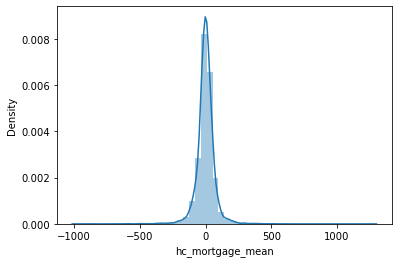

In [92]:
sns.distplot(residual)